In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

# scikit-learnの紹介

## 学習データの入力

学習用データの読み込み

- train.csv
    - x1, x2: 予測に利用するデータ
    - y: 予測したい対象

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,x1,x2,y
0,-0.029746,-0.634758,1
1,-0.287244,1.052591,0
2,0.747795,0.549574,0
3,1.127568,-1.652896,1
4,0.249423,0.370420,0


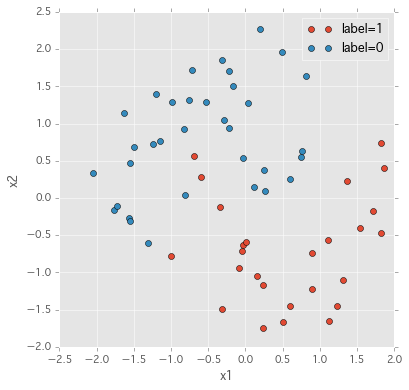

In [3]:
# 2次元なので描画してみる

plt.figure(figsize=(6, 6))
for label in (1, 0):
    plt.plot(train_df[train_df.y == label].x1, train_df[train_df.y == label].x2, 'o', label='label={}'.format(label))
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## モデルの学習

In [4]:
from sklearn.svm import SVC

model = SVC(gamma=2, C=1)                               # 任意のアルゴリズムを選択
model.fit(train_df[['x1', 'x2']], train_df[['y']])  # 選択したアルゴリズムを利用して学習

/Users/amacbee/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## テストデータを予測

テストデータを読み込み

In [5]:
test_df = pd.read_csv('test.csv')
test_df.head()

,x1,x2,y
0,0.155818,-1.145737,1
1,-0.977863,1.510417,0
2,0.626822,-2.143372,1
3,-1.406588,-1.036872,0
4,-0.341948,-0.502986,1


In [6]:
# 作成したモデルを使ってテストデータの入力から結果を予測

y_pred = model.predict(test_df[['x1', 'x2']])
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

## 予測結果の評価

In [7]:
# 予測精度

100 * model.score(test_df[['x1', 'x2']], test_df['y'])

87.5

------------------------------------

## 補足 - モデルの性能を描画

In [8]:
import numpy as np

x_min, x_max = train_df['x1'].min() - .5, train_df['x1'].max() + .5
y_min, y_max = train_df['x2'].min() - .5, train_df['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

def cal_z(model):
    if hasattr(model, "decision_function"): z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else: z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    return z.reshape(xx.shape)

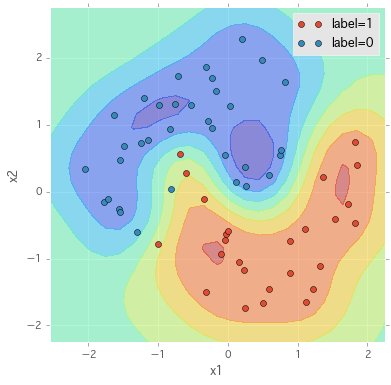

In [9]:
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, cal_z(model), alpha=.4)       # 分類器の分類性能をヒートマップ形式で表示
for label in (1, 0):
    plt.plot(train_df[train_df.y == label].x1, train_df[train_df.y == label].x2, 'o', label='label={}'.format(label))
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

テストデータを予測した結果を描画

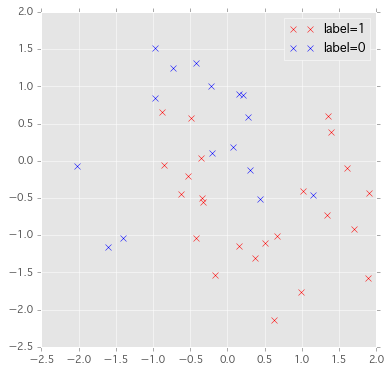

In [10]:
plt.figure(figsize=(6, 6))
for label, color in zip((1, 0), ('red', 'blue')):
    plt.plot(test_df[test_df.y == label].x1, test_df[test_df.y == label].x2, 'x', label='label={}'.format(label), c=color)
plt.legend()

モデルおよびテストデータを予測した結果を描画

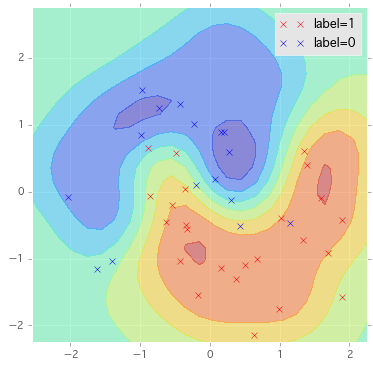

In [11]:
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, cal_z(model), alpha=.4)
for label, color in zip((1, 0), ('red', 'blue')):
    plt.plot(test_df[test_df.y == label].x1, test_df[test_df.y == label].x2, 'x', label='label={}'.format(label), c=color)
plt.legend()

## 様々なアルゴリズムの利用例

/Users/amacbee/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


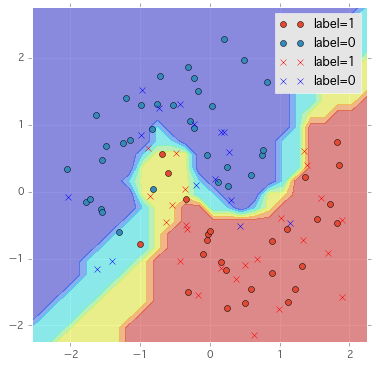

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(3)
model.fit(train_df[['x1', 'x2']], train_df[['y']])

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, cal_z(model), alpha=.4)
for label in (1, 0):
    plt.plot(train_df[train_df.y == label].x1, train_df[train_df.y == label].x2, 'o', label='label={}'.format(label))
for label, color in zip((1, 0), ('red', 'blue')):
    plt.plot(test_df[test_df.y == label].x1, test_df[test_df.y == label].x2, 'x', label='label={}'.format(label), c=color)
plt.legend()

/Users/amacbee/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


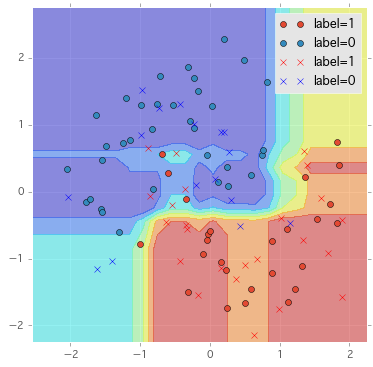

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(train_df[['x1', 'x2']], train_df[['y']])

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, cal_z(model), alpha=.4)
for label in (1, 0):
    plt.plot(train_df[train_df.y == label].x1, train_df[train_df.y == label].x2, 'o', label='label={}'.format(label))
for label, color in zip((1, 0), ('red', 'blue')):
    plt.plot(test_df[test_df.y == label].x1, test_df[test_df.y == label].x2, 'x', label='label={}'.format(label), c=color)
plt.legend()